In [1]:
# original image size

import cv2

# Path to a sample EuroSAT image
image_path = "../data/selected_categories/EuroSAT/AnnualCrop/AnnualCrop_1538.jpg"

# Load the image using OpenCV
sample_orig_eurosat_image = cv2.imread(image_path)

# Get the dimensions of the image (height, width, channels)
sample_orig_eurosat_image_size = sample_orig_eurosat_image.shape

print(f"The dimensions of the original EuroSAT image are: {sample_orig_eurosat_image_size}")


The dimensions of the original EuroSAT image are: (64, 64, 3)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load images and labels
training_dir = "../data/training_data_224"  # Adjust path as needed
images = np.load(f"{training_dir}/HerbaceousVegetation_train.npy")
labels = np.load(f"{training_dir}/HerbaceousVegetation_train_labels.npy")

# Visualize a few images and their labels
for i in range(5):  # Change the range to check more samples
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")  # Display the label
    plt.show()


In [3]:
import numpy as np

# Load the .npy file
orig_image_resize = np.load("../data/preprocessed_data_224/AnnualCrop_batch_15.npy")

# Get the shape of the array
orig_image_resize_chk = orig_image_resize.shape

print(f"The dimensions of the original image after resizing : {orig_image_resize_chk}")


The dimensions of the original image after resizing : (20, 224, 224, 3)


In [5]:
import numpy as np

split = 'train'
# Load the .npy file
category_data_npy = np.load(f"../data/training_data_224/AnnualCrop_{split}.npy")

# Get the shape of the array
category_data_npy_chk = category_data_npy.shape

print(f"The dimensions of the {split} data image after resizing : {category_data_npy_chk}")


The dimensions of the train data image after resizing : (1920, 224, 224, 3)


In [ ]:
import numpy as np

# Load the .npy file
orig_image_resize = np.load("../data/preprocessed_data_imSize256/AnnualCrop_batch_15.npy")

# Get the shape of the array
orig_image_resize_chk = orig_image_resize.shape

print(f"The dimensions of the original image after resizing : {orig_image_resize_chk}")


In [5]:
import numpy as np

category = 'train'
# Load the .npy file
category_data_npy = np.load(f"../data/training_data/AnnualCrop_{category}.npy")

# Get the shape of the array
category_data_npy_chk = category_data_npy.shape

print(f"The dimensions of the {category} data image after resizing : {category_data_npy_chk}")


The dimensions of the train data image after resizing : (1920, 256, 256, 3)


In [ ]:
import numpy as np

# Load the .npy file
category_label_npy = np.load(f"../data/training_data/AnnualCrop_{category}_labels.npy")

# Get the shape of the array
category_label_npy_chk = category_label_npy.shape

print(f"The dimensions of the {category} label image after resizing : {category_label_npy_chk}")


Unique labels in the dataset for Industrial_train: [5]
Dataset size: 1600


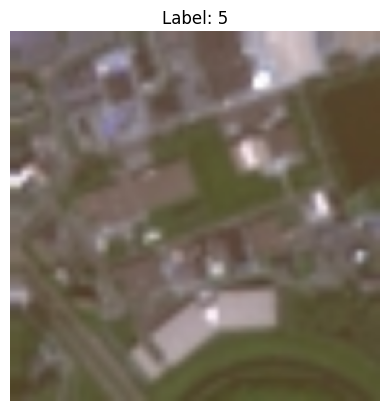

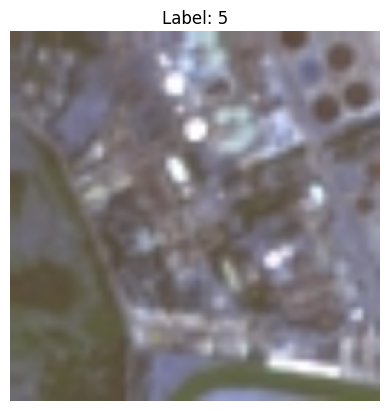

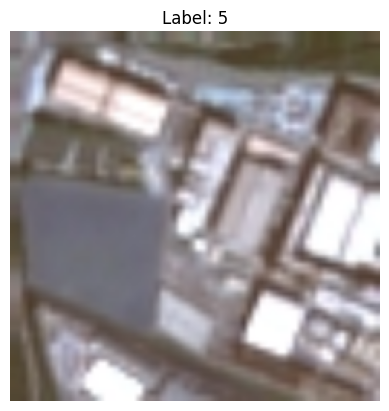

Unique labels in the dataset for Industrial_val: [5]
Dataset size: 400


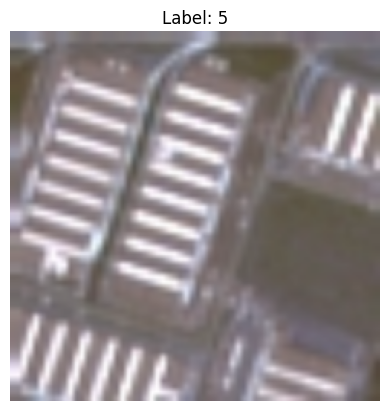

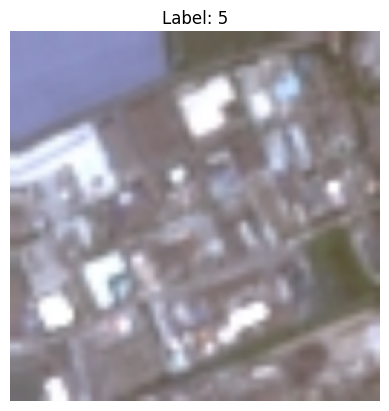

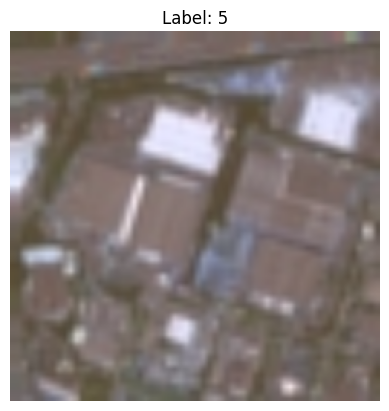

Unique labels in the dataset for Industrial_test: [5]
Dataset size: 500


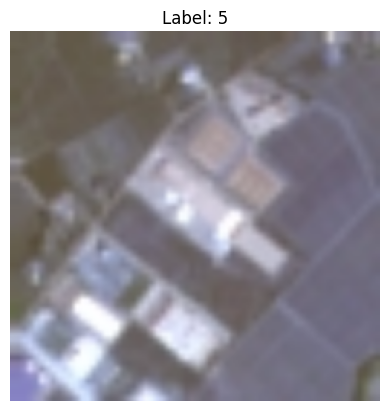

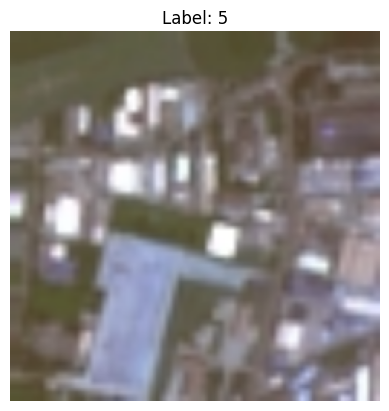

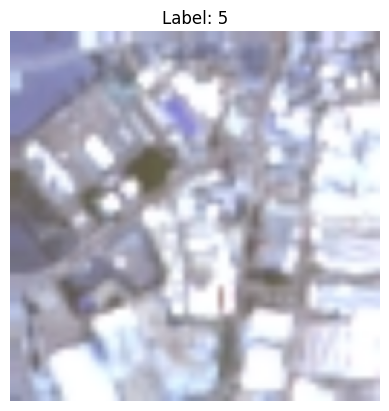

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random


# Forest → [0]; Residential → [1]; Highway → [2]; AnnualCrop → [3]; HerbaceousVegetation → [4]; Industrial → [5]

# Paths;
category = "Industrial"  # Change as needed
splits = ["train", "val", "test"]          # Options: train, val, test
training_dir = "../data/training_data"

for split in splits:
    # Load images and labels
    image_path = os.path.join(training_dir, f"{category}_{split}.npy")
    label_path = os.path.join(training_dir, f"{category}_{split}_labels.npy")
    
    images = np.load(image_path)
    labels = np.load(label_path)
    
    
    # Ensure data is normalized to uint8 for visualization
    if images.max() <= 1.0:
        images = (images * 255).astype(np.uint8)
    elif images.dtype != np.uint8:
        images = images.astype(np.uint8)

    # Check unique labels
    print(f"Unique labels in the dataset for {category}_{split}:", np.unique(labels))
    
    # Check the size of the dataset
    dataset_size = len(images)
    print(f"Dataset size: {dataset_size}")
    
    # Randomly sample 3 indices (ensure it's within bounds)
    num_samples = 3
    sample_indices = random.sample(range(dataset_size), num_samples)
    
    # Check the random 3 samples
    for i in sample_indices:
        plt.imshow(images[i])  # Display the image
        plt.title(f"Label: {labels[i]}")  # Display the corresponding label
        plt.axis('off')  # Hide axis for cleaner display
        plt.show()


Shape of labels_one_hot: (1920, 6)
Unique class indices in the dataset for Forest_train: [0]
Dataset size: 1920


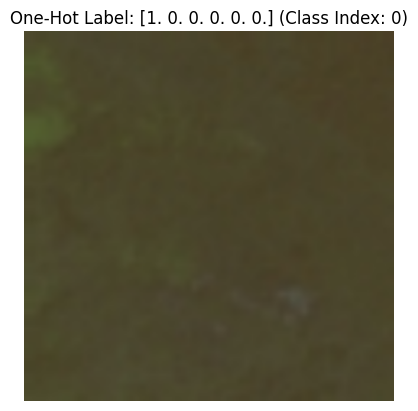

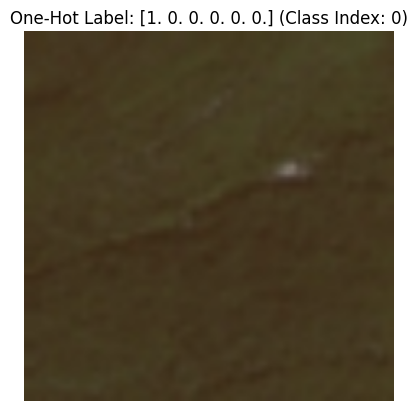

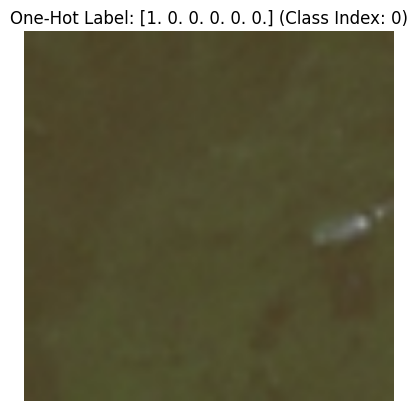

Shape of labels_one_hot: (480, 6)
Unique class indices in the dataset for Forest_val: [0]
Dataset size: 480


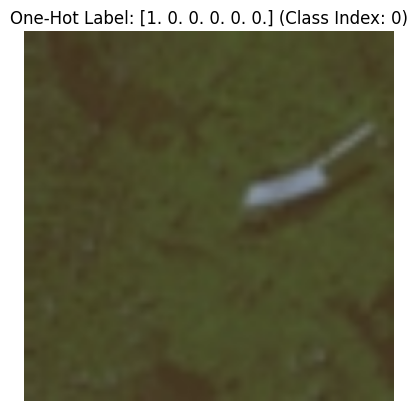

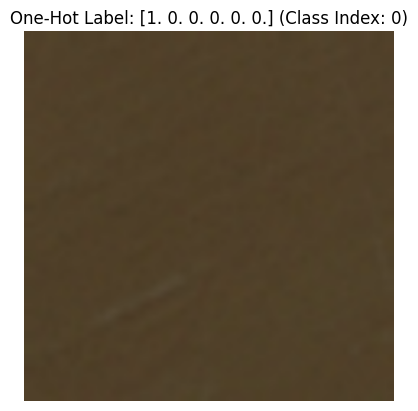

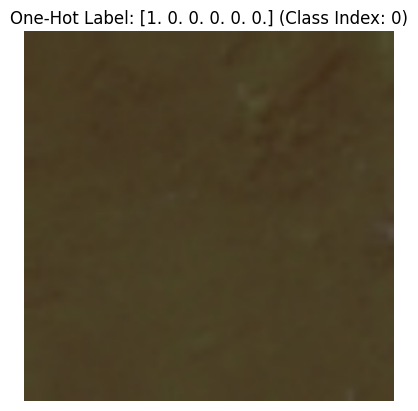

Shape of labels_one_hot: (600, 6)
Unique class indices in the dataset for Forest_test: [0]
Dataset size: 600


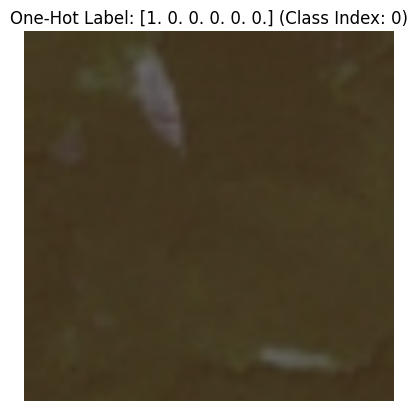

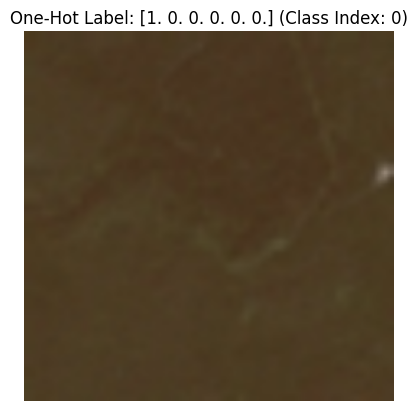

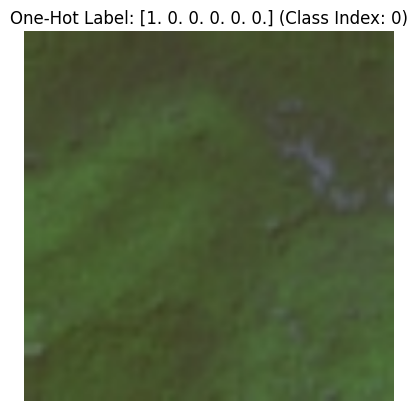

In [39]:
# for one hot encoded labels

import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Forest → [0]; Residential → [1]; Highway → [2]; AnnualCrop → [3]; HerbaceousVegetation → [4]; Industrial → [5]

# Paths;
category = "Forest"  # Change as needed
splits = ["train", "val", "test"]          # Options: train, val, test
training_dir = "../data/training_data"

for split in splits:
    # Load images and labels
    image_path = os.path.join(training_dir, f"{category}_{split}.npy")
    encode_label_path = os.path.join(training_dir, f"{category}_{split}_labels_one_hot.npy")
  

    images = np.load(image_path)
    labels_one_hot = np.load(encode_label_path)

    # Debug: Check the shape of one-hot encoded labels
    print("Shape of labels_one_hot:", labels_one_hot.shape)

    # Ensure data is normalized to uint8 for visualization
    if images.max() <= 1.0:
        images = (images * 255).astype(np.uint8)
    elif images.dtype != np.uint8:
        images = images.astype(np.uint8)

    # Check unique labels
    # Check unique labels in one-hot encoded dataset
    unique_labels = np.unique(np.argmax(labels_one_hot, axis=1))
    print(f"Unique class indices in the dataset for {category}_{split}: {unique_labels}")

    
    # Check the size of the dataset
    dataset_size = len(images)
    print(f"Dataset size: {dataset_size}")
    
    # Randomly sample 3 indices (ensure it's within bounds)
    num_samples = 3
    sample_indices = random.sample(range(dataset_size), num_samples)
    

    for i in sample_indices:
        plt.imshow(images[i])  # Display the image
        label_index = np.argmax(labels_one_hot[i])  # Get the class index from one-hot label
        plt.title(f"One-Hot Label: {labels_one_hot[i]} (Class Index: {label_index})")
        plt.axis('off')  # Hide axis for cleaner display
        plt.show()


In [ ]:
# for one hot encoded labels

import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Forest → [0]; Residential → [1]; Highway → [2]; AnnualCrop → [3]; HerbaceousVegetation → [4]; Industrial → [5]

# Paths;
category = "Residential"  # Change as needed
splits = ["train", "val", "test"]          # Options: train, val, test
training_dir = "../data/training_data_224"

for split in splits:
    # Load images and labels
    image_path = os.path.join(training_dir, f"{category}_{split}.npy")
    label_path = os.path.join(training_dir, f"{category}_{split}_labels.npy")
  

    images = np.load(image_path)
    labels = np.load(label_path)

    # Debug: Check the shape of one-hot encoded labels
    print("Shape of labels:", labels.shape)

    # Check the range of pixel values in the dataset
    print(f"Min pixel value: {images.min()}")
    print(f"Max pixel value: {images.max()}")

    # Check the range of pixel values in the dataset
    print(f"Min pixel value for Labels: {labels.min()}")
    print(f"Max pixel value for Labels: {labels.max()}")
    

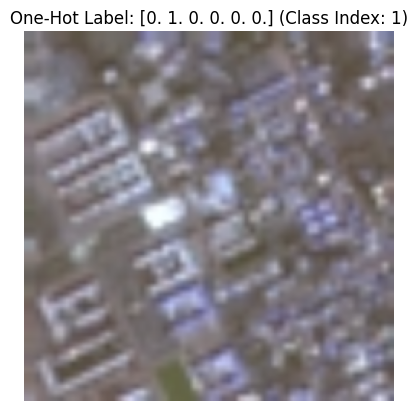

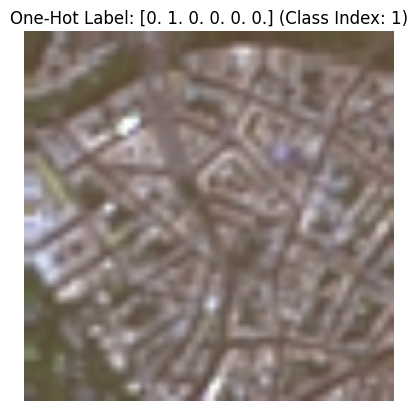

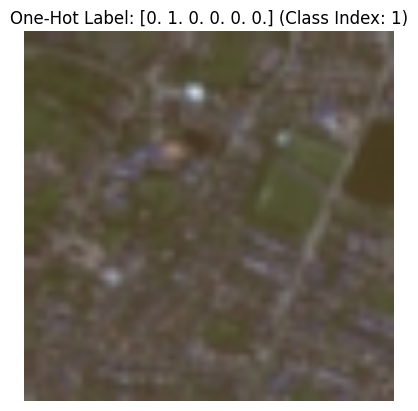

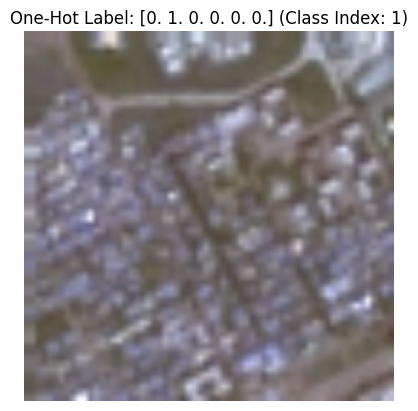

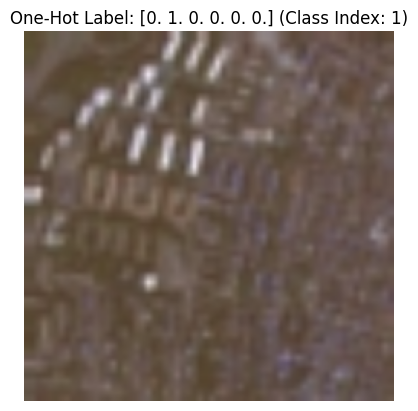

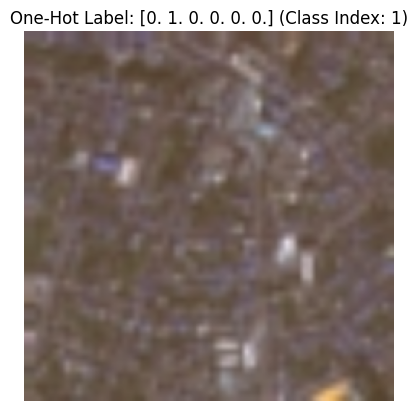

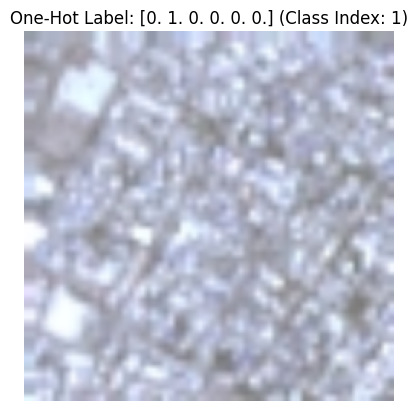

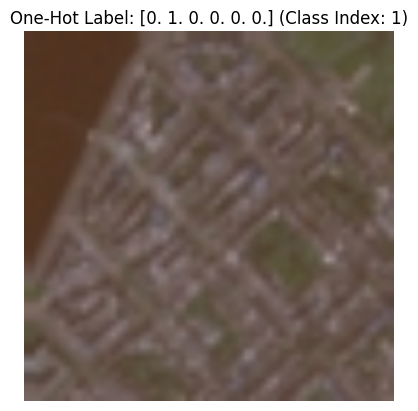

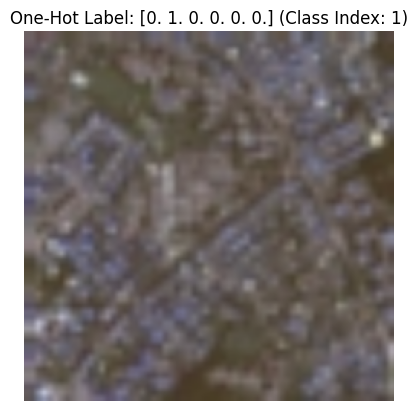

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Forest → [0]; Residential → [1]; Highway → [2]; AnnualCrop → [3]; HerbaceousVegetation → [4]; Industrial → [5]

# Paths;
category = "Residential"  # Change as needed
splits = ["train", "val", "test"]          # Options: train, val, test
training_dir = "../data/training_data"

for split in splits:
    # Load images and labels
    image_path = os.path.join(training_dir, f"{category}_{split}.npy")
    encode_label_path = os.path.join(training_dir, f"{category}_{split}_labels_one_hot.npy")
  

    for i in random.sample(range(len(images)), 3):
        plt.imshow(images[i])
        plt.title(f"One-Hot Label: {labels_one_hot[i]} (Class Index: {np.argmax(labels_one_hot[i])})")
        plt.axis('off')
        plt.show()


In [ ]:
training_dir = "../data/training_data_224"
images = np.load(f'{training_dir}/AnnualCrop_train.npy')
labels = np.load(f'{training_dir}/AnnualCrop_train_labels.npy')

# Check sample shapes and alignment
print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")
print(f"First 5 labels: {labels[:5]}")

# Debug: Check the shape of one-hot encoded labels
print("Shape of labels:", labels.shape)

# Check the range of pixel values in the dataset
print(f"Min pixel value: {images.min()}")
print(f"Max pixel value: {images.max()}")

# Check the range of pixel values in the dataset
print(f"Min pixel value for Labels: {labels.min()}")
print(f"Max pixel value for Labels: {labels.max()}")


#cv2.imshow('Sample Image', images[0])
#cv2.waitKey(0)
#cv2.destroyAllWindows()


Images shape: (1920, 224, 224, 3), Labels shape: (1920,)
First 5 labels: [3 3 3 3 3]
